In [1]:
# Data wrangling
import pandas as pd
import numpy as np
# Data visualisation
import seaborn as sns
# sns.set_palette('colorblind')

%matplotlib inline
import matplotlib.pyplot as plt

# Statistical Libraries
from scipy.stats import skew, kurtosis,chi2_contingency

# missing values
import missingno as msno

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import math
from re import sub
from decimal import Decimal
from itertools import product


In C:\Users\Bita\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Bita\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Bita\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Bita\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


In [2]:
# Set palette 
colorblind=["#0072B2", "#009E73", "#D55E00",
                "#CC79A7", "#F0E442", "#56B4E9"]
newPal_dic= {'P I F': colorblind[5], 
         'CHGOFF' : '#d7191c'}
newPal = ['#d7191c',colorblind[5]]

In [3]:
# import data
raw_data = pd.read_csv('SBAnational.csv')
raw_data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
raw_data.shape

(899164, 27)

In [5]:
raw_data.dtypes.value_counts()

object     17
int64       9
float64     1
dtype: int64

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
LoanNr_ChkDgt        899164 non-null int64
Name                 899150 non-null object
City                 899134 non-null object
State                899150 non-null object
Zip                  899164 non-null int64
Bank                 897605 non-null object
BankState            897598 non-null object
NAICS                899164 non-null int64
ApprovalDate         899164 non-null object
ApprovalFY           899164 non-null object
Term                 899164 non-null int64
NoEmp                899164 non-null int64
NewExist             899028 non-null float64
CreateJob            899164 non-null int64
RetainedJob          899164 non-null int64
FranchiseCode        899164 non-null int64
UrbanRural           899164 non-null int64
RevLineCr            894636 non-null object
LowDoc               896582 non-null object
ChgOffDate           162699 non-null object
DisbursementDate 

In [7]:
raw_data.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [8]:
# Function to calculate missing values by column# Funct 
"""
   input: data frame
   output: a table with missing values 
   """
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values = missing_values_table(raw_data)
missing_values

Your selected dataframe has 27 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
ChgOffDate,736465,81.9
RevLineCr,4528,0.5
LowDoc,2582,0.3
DisbursementDate,2368,0.3
MIS_Status,1997,0.2
BankState,1566,0.2
Bank,1559,0.2
NewExist,136,0.0
City,30,0.0
Name,14,0.0


The column ChgOffDate has almost 82% missing values! which probably means 82% of the loans are paid in full!

<AxesSubplot:>

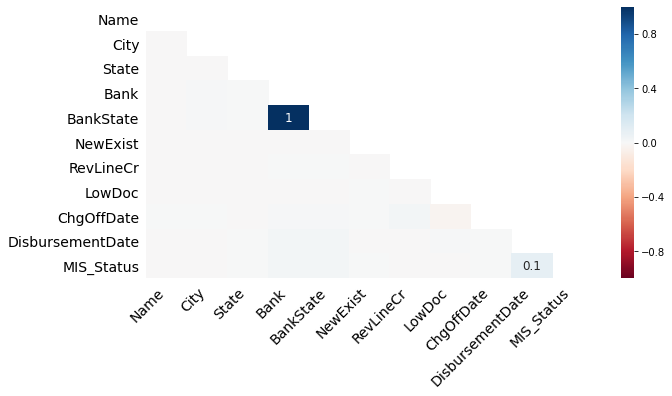

In [10]:
msno.heatmap(raw_data,figsize=(10, 5),fontsize=14)

#### Target
 P I F : more likely to pay in full (low risk)
 
 CHGOFF : more likely to fail in paying in full (defaulted/chargeded off) (high risk)

In [11]:
raw_data['MIS_Status'].unique()

array(['P I F', 'CHGOFF', nan], dtype=object)

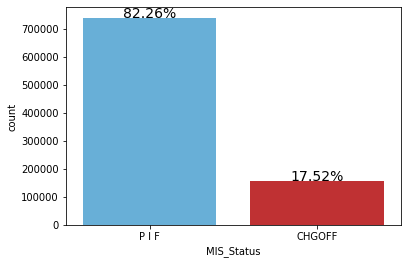

In [12]:
s = sns.countplot(x = 'MIS_Status',data = raw_data,palette=newPal_dic)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(raw_data)*100),
            ha="center", fontsize=14) 

We have an imbalanced data set.

#### Name: borrower name

<AxesSubplot:xlabel='Name'>

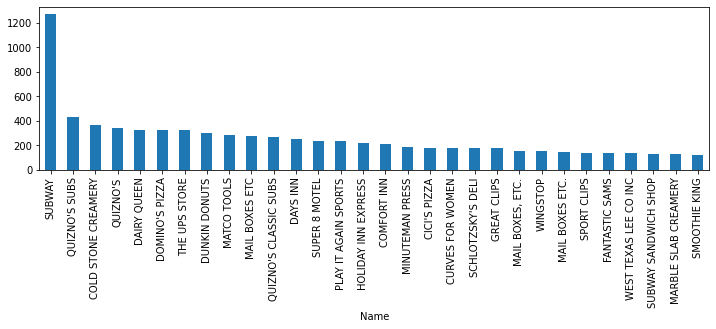

In [13]:
# top 30 borrower companies with the highest loan request
df = raw_data.groupby(['Name'])['MIS_Status'].count().sort_values(ascending=False).head(30)
df.plot.bar(figsize=(12,3))

In [157]:
np.any(raw_data.loc[raw_data['Name']=='SUBWAY','MIS_Status']=='CHOFF')

False

Subway has the largest number of loan request. Also, it has paid all the loans in full!

#### State: borrower state

In [16]:
# import plotly.express as px
# fig = px.choropleth(raw_data,
#                     locations='State', 
#                     locationmode="USA-states", 
#                     scope="usa",
#                     color='',
#                     color_continuous_scale="Viridis_r", 
#                     )
# fig.show()

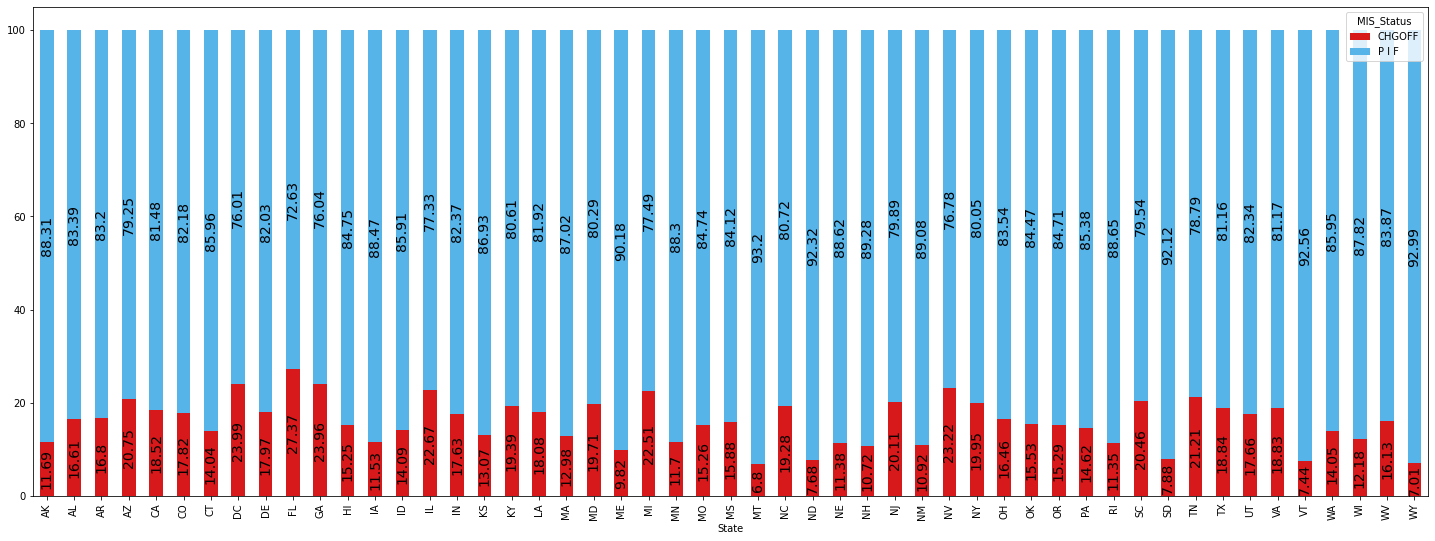

In [17]:
perc = lambda x: np.round(100 * x / x.sum(),2)
df3 = raw_data.groupby(['State','MIS_Status'])['MIS_Status'].count()
ax = df3.groupby('State').apply(perc).unstack().plot.bar(stacked=True,
                                                         figsize=(25,9),
                                                         color=newPal)
labels = [f'{i}' for i in df3.groupby('State').apply(perc).unstack().to_numpy().flatten(order='F')]
for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center', c='black', rotation=90,fontsize=14)

States including WY, ND and MT have lower default rate (have stronger economy).

While states like Florida and DC have higher default rate.

##### State vs City

<AxesSubplot:xlabel='State'>

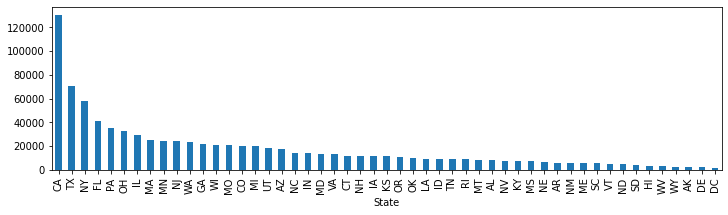

In [18]:
plt.figure(figsize=(12,3))
raw_data.groupby('State')['City'].count().sort_values(ascending=False).plot.bar()

California has the largest number of loan borrowers!

##### Bankstate vs Bank

In [19]:
df1= raw_data.groupby(['BankState','Bank'])['Bank'].count()
df1

BankState  Bank                         
AK         ALASKA EASTERN PARTNERS            2
           ALASKA GROWTH CAP. BIDCO INC.     70
           ALASKA SOUTHERN PARTNERS           7
           ALASKA USA FCU                     3
           CENTURY ENTERPRISES INC            1
                                           ... 
WY         WELLS FARGO BANK NATL ASSOC      387
           WYOMING BANK & TRUST              15
           WYOMING COMMUNITY BANK            13
           WYOMING INDUSTRIAL                 2
           WYOMING STATE BANK                 2
Name: Bank, Length: 7206, dtype: int64

Lets see for each state, which bank is more and less active in giving loans:

In [20]:
df1.sort_values().groupby(level=0).tail(1)

BankState  Bank                          
EN         BARCLAYS BANK PLC                     1
AN         T.C. ZIRAAT BANKASI A.S.              1
VI         GOVERNMENT DEVEL BK FOR VIRGIN        1
GU         BANK OF GUAM                          2
PR         BANCO POPULAR DE PUERTO RICO        151
WY         WELLS FARGO BANK NATL ASSOC         387
AK         FIRST NATIONAL BANK ALASKA          422
WV         BRANCH BK. & TR CO                  422
LA         GULF COAST BK & TR CO               451
ME         MERRILL BANK, A DIVISION OF         454
ND         DAKOTA CERT. DEVEL CO               523
IA         U.S. BANK NATIONAL ASSOCIATION      546
KS         INTRUST BANK NATL ASSOC             588
NM         VECTRA BK COLORADO NATL ASSOC       616
KY         PNC BANK, NATIONAL ASSOCIATION      829
MT         FIRST INTERSTATE BANK               896
AZ         BUSINESS DEVEL FINAN CORP           903
ID         MOUNTAIN W. BANK A DIVISION OF      949
NE         FIRST NATIONAL BANK OF OMAHA 

In [21]:
df1.sort_values().groupby(level=0).head(1)

BankState  Bank                          
NJ         CITIBANK, N.A.                    1
MO         RTC FIN SER CEN/FIN#2129          1
FL         FIRST AMERICA BANK                1
MS         BANCORPSOUTH, INC.                1
MT         TWO RIVERS BANK                   1
NC         ALBEMARLE DEVEL AUTHORITY         1
EN         BARCLAYS BANK PLC                 1
DE         WSFS CREDIT CORPORATION           1
MN         FRANKLIN NATL BK OF MINNEAPOLI    1
GA         AGGEORGIA FARM CREDIT, ACA        1
CO         GUARANTY BANCORP                  1
NV         M&I NEVADA, A BRANCH OF           1
NY         ASTORIA FED. S & L ASSOC          1
NM         ACCESS ANYTIME BANCORP, INC.      1
OH         APPLE CREEK BK. CO                1
CA         WILSHIRE MORTGAGE CORP DBA        1
NE         BANK OF STEINAUER                 1
DC         EAGLEBANK                         1
CT         WACHOVIA BANK NATL ASSOC          1
ND         STARION BANCORPORATION            1
IA         THE HAM

<AxesSubplot:xlabel='BankState', ylabel='count'>

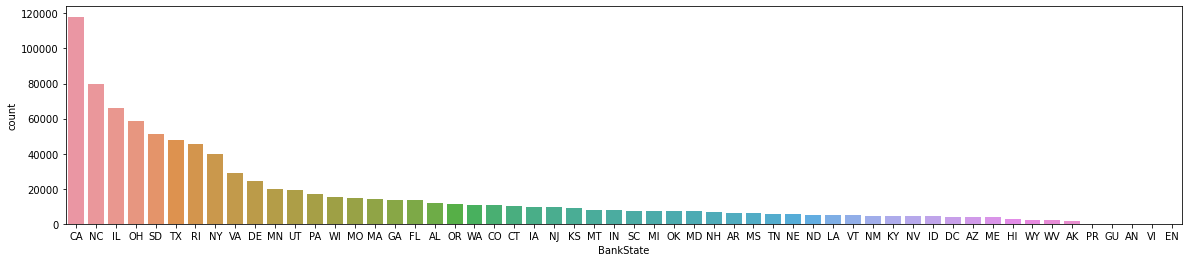

In [23]:
plt.figure(figsize=(20,4))
sns.countplot(x = 'BankState',data = raw_data, order= raw_data['BankState'].value_counts().index)

##### Borrower state vs Bank state

In [24]:
raw_data.groupby(['State','BankState'])['Bank'].count()

State  BankState
AK     AK           1414
       AR              3
       CA            144
       CO              3
       CT              3
                    ... 
WY     SD            237
       TX             12
       UT            170
       VA             31
       WY           2107
Name: Bank, Length: 1730, dtype: int64

People can get a loan from different states in addition to the state they are living in.

In [25]:
raw_data.groupby(['State','BankState'])['Bank'].count().sort_values().groupby(level=0).tail(1)

State  BankState
DC     CA             481
DE     DE             990
AK     AK            1414
WV     WV            1794
WY     WY            2107
SC     SC            2307
NV     NV            2679
HI     HI            2937
ME     ME            3583
NM     NM            3614
AZ     AZ            3709
SD     SD            3750
ID     ID            3780
TN     TN            3934
KY     KY            4023
VT     VT            4215
OR     OR            4573
ND     ND            4693
NE     NE            4752
LA     LA            4767
AR     AR            4772
MS     MS            4972
MD     MD            5335
VA     VA            5351
AL     AL            5395
CT     CT            5486
NH     NH            6137
IN     IN            6572
OK     OK            6976
MI     MI            7148
NJ     NJ            7190
RI     RI            7430
CO     CO            7620
MT     MT            7688
KS     KS            7799
NC     NC            8655
IA     IA            9389
GA     GA            

People usually get a loan from a bank in the same state that they are living in. However, this is not the case for states like Florida and DC. People in Florida mostly get loans from North Carolina, and People in DC mostly get loans from California. This is justified by our earlier observation regarding the higher default rate for these two states (less strong economy)

#### NAICS: North American industry classification system code

In [26]:
raw_data.NAICS

0         451120
1         722410
2         621210
3              0
4              0
           ...  
899159    451120
899160    451130
899161    332321
899162         0
899163         0
Name: NAICS, Length: 899164, dtype: int64

In [169]:
raw_data['NAICS'] = raw_data['NAICS'].replace({0: np.nan})

In [170]:
# extract the first 2 digits
def first_two_digit(d):
     return (d // 10 ** (int(math.log(d, 10)) - 1))

In [171]:
raw_data['NAICS_Sector'] = raw_data.loc[raw_data['NAICS'].notnull(),'NAICS'].apply(first_two_digit)

In [172]:
# classiy base on the first two digits
dic = {11: 'Agriculture',            # and forestry, fishing and hunting
       21: 'Extraction',             # i.e., Mining, quarrying, and oil and gas extraction
       22: 'Utilities',
       23: 'Construction',
       31: 'Manufacturing',
       32: 'Manufacturing',
       33: 'Manufacturing',
       42: 'WholesaleTrade',
       44: 'Retail',
       45: 'Retail',
       48: 'Transportation',          # and warehousing
       49: 'Transportation',
       51: 'Information',
       52: 'Finance',
       53: 'RealState',               # and rental and leasing
       54: 'ProfessionalServices',    # scientific, and technical services
       55: 'CompaniesManagement',
       56: 'AdministrativeServices',  # and support and waste management and remediation services
       61: 'EducationalServices',
       62: 'HealthCare',              # and social assistance
       71: 'Arts', 
       72: 'FoodServices',
       81: 'OtherServices',           # except public administration) 92 Public administration
       92: 'PublicAdministration'
       }
raw_data['NAICS_Sector'] = raw_data['NAICS_Sector'].replace(dic).astype('category')

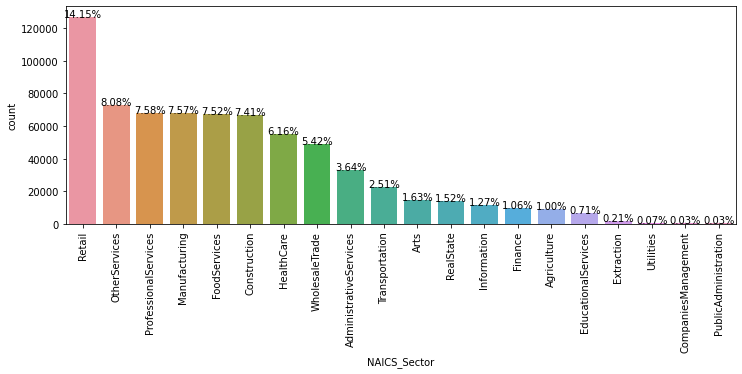

In [34]:
plt.figure(figsize=(12,4))
s = sns.countplot(x = 'NAICS_Sector', data=raw_data, 
              order = raw_data['NAICS_Sector'].value_counts().index)
plt.xticks(rotation=90)

sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(raw_data)*100),
            ha="center", fontsize=10) 

Real estate and rental and leasing has the largest number of borrowers.

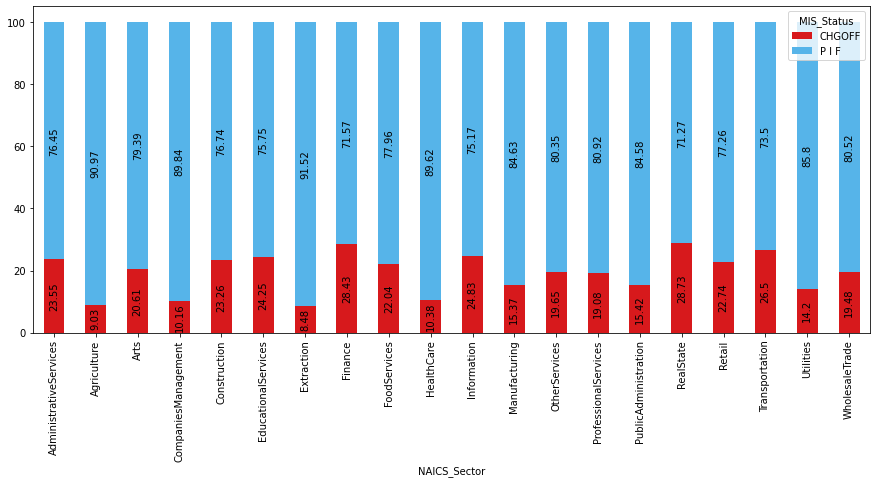

In [35]:
# calculate the percentage of success or failure in paying the loan for each sector and plot it

df2 = raw_data.groupby(['NAICS_Sector','MIS_Status'])['MIS_Status'].count()
ax = df2.groupby('NAICS_Sector').apply(perc).unstack().plot.bar(figsize = (15,6),
                                                                stacked=True,
                                                                color=newPal)
labels = [f'{i}' for i in df2.groupby('NAICS_Sector').apply(perc).unstack().to_numpy().flatten(order='F')]
for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center', c='black',rotation=90)

Industries like 1. Mining, quarrying, and oil and gas extraction, 2. Agriculture 3. Management of companies and enterprises have lower default rate. 

While industries like 1. Real estate and rental and leasing and 2. finance have higher default rate.

0.0


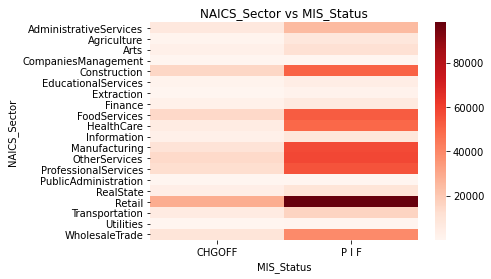

In [37]:
my_contingency_table = pd.crosstab(index=raw_data["NAICS_Sector"], columns=raw_data["MIS_Status"])
ax = sns.heatmap(my_contingency_table, cmap="Reds")
ax.set_title("NAICS_Sector vs MIS_Status")
p_value = chi2_contingency(my_contingency_table)[1]
print(p_value)

#### ApprovalFY: Fiscal year of commitment

In [38]:
raw_data['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

There is a mix of numerical variables and strings in the array. Also, there is a mistake in one of the years, i.e., '1976A'.Lets correct them

In [39]:
raw_data['ApprovalFY'] = raw_data['ApprovalFY'].replace({'1976A':'1976'})

In [40]:
from collections import defaultdict
d = defaultdict(list)
for x in raw_data['ApprovalFY'].unique():
    d[type(x)].append(x)
# d[int] 
d[str]

['2004',
 '1994',
 '1979',
 '1976',
 '1967',
 '1975',
 '1974',
 '1977',
 '1981',
 '1982',
 '1983',
 '1984',
 '1978',
 '1980',
 '1968',
 '1969',
 '1995',
 '1970',
 '2005',
 '1996',
 '1971']

In [41]:
dic = {'2004':2004,
       '1994':1994,
       '1979':1979,
       '1976':1976,
       '1967':1967,
       '1975':1975,
       '1974':1974,
       '1977':1977,
       '1981':1981,
       '1982':1982,
       '1983':1983,
       '1984':1984,
       '1978':1978,
       '1980':1980,
       '1968':1968,
       '1969':1969,
       '1995':1995,
       '1970':1970,
       '2005':2005,
       '1996':1996,
       '1971':1971}
raw_data['ApprovalFY'] = raw_data['ApprovalFY'].replace(dic).astype('category')

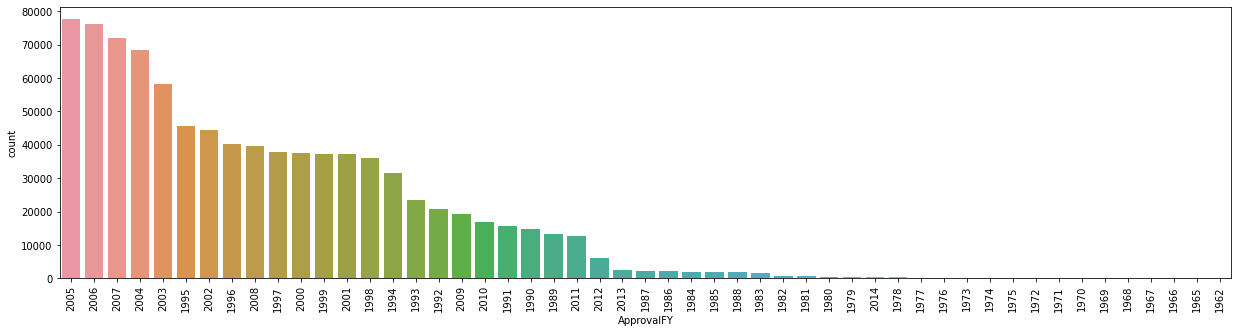

In [43]:
plt.figure(figsize=(21,5))
sns.countplot(x = 'ApprovalFY', data=raw_data, 
              order= raw_data['ApprovalFY'].value_counts().index)
plt.xticks(rotation=90)
plt.show()



2005 and 2006 have the largest number of loan requests. 

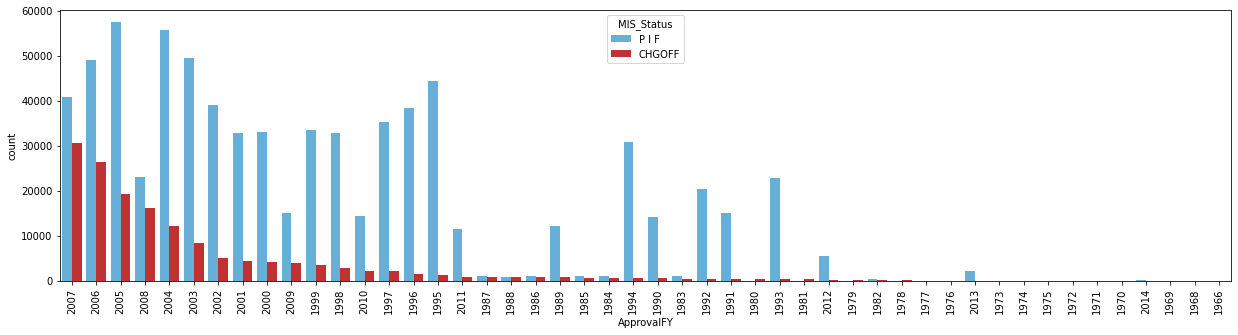

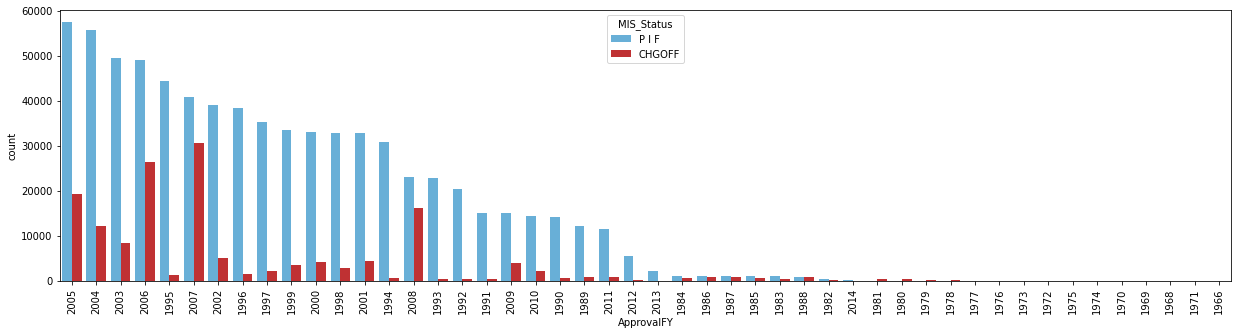

In [44]:
# order by subclasses
orderby_subcat = pd.crosstab(raw_data['ApprovalFY'], 
                             raw_data['MIS_Status']).sort_values('CHGOFF', ascending=False).index
plt.figure(figsize=(21,5))
sns.countplot(x = 'ApprovalFY', data=raw_data, 
              order= orderby_subcat,
              hue = 'MIS_Status',palette=newPal_dic)
plt.xticks(rotation=90)
plt.show()


orderby_subcat1 = pd.crosstab(raw_data['ApprovalFY'], 
                             raw_data['MIS_Status']).sort_values('P I F', ascending=False).index
plt.figure(figsize=(21,5))
sns.countplot(x = 'ApprovalFY', data=raw_data, 
              order= orderby_subcat1,
              hue = 'MIS_Status',palette=newPal_dic)
plt.xticks(rotation=90)
plt.show()

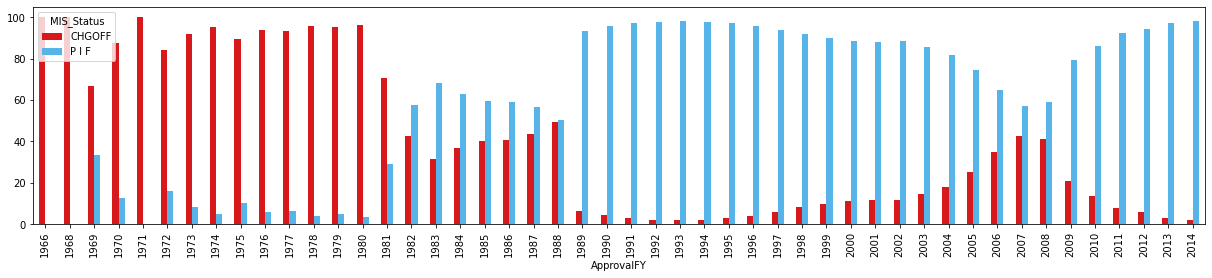

In [46]:
df3 = raw_data.groupby(['ApprovalFY','MIS_Status'])['MIS_Status'].count()
ax= df3.groupby('ApprovalFY').apply(perc).unstack().plot.bar(figsize=(21,4),
                                                             sort_columns=True,
                                                             color=newPal)

One can see the effect of recession (2007 and 2008) on the status of the loans.

#### Term: Loan term in months

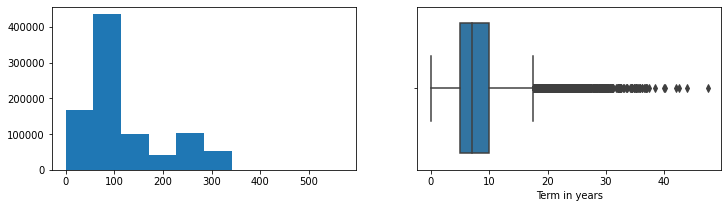

In [152]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.hist(raw_data['Term'])

plt.subplot(122)
sns.boxplot(raw_data['Term']/12)
plt.xlabel('Term in years')
plt.show()

#### NoEmp: Number of business employees

In [49]:
raw_data['NoEmp'].describe()

count    899164.000000
mean         11.411353
std          74.108196
min           0.000000
25%           2.000000
50%           4.000000
75%          10.000000
max        9999.000000
Name: NoEmp, dtype: float64

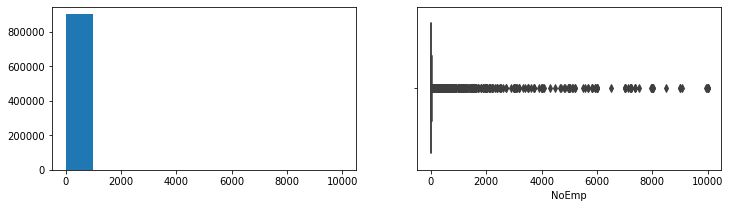

In [50]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.hist(raw_data['NoEmp'])

plt.subplot(122)
sns.boxplot('NoEmp', data = raw_data )
plt.show()

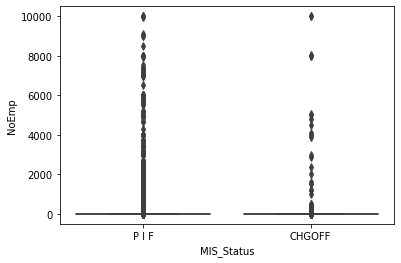

In [51]:
sns.boxplot(y = 'NoEmp', data= raw_data, x = 'MIS_Status')
plt.show()

#### NewExist: 
1 = Existing business,
2 = New business

In [52]:
raw_data['NewExist'].unique()

array([ 2.,  1.,  0., nan])

In [53]:
raw_data['NewExist']= raw_data['NewExist'].replace({0:np.nan,
                                                    1: 'Existing',
                                                    2: 'New'}).astype('category')

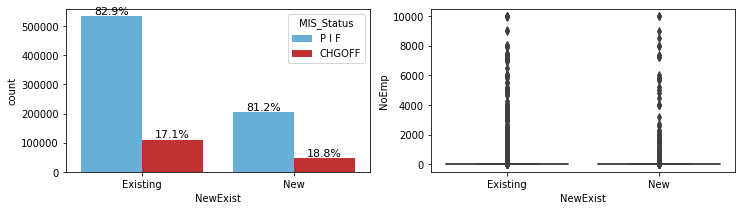

In [54]:
def annotate_countplot(ax):
    """ add percentage on the countplot bars relative to the hue variable"""
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')
            
plt.figure(figsize=(12,3))
plt.subplot(121)
ax = sns.countplot(x = 'NewExist', hue = 'MIS_Status', data=raw_data,palette=newPal_dic)
annotate_countplot(ax)

plt.subplot(122)
sns.boxplot(x = 'NewExist', y = 'NoEmp', data =raw_data)
plt.show()

The default rate for new and existing businesses are very similar!

2.4757676001016573e-75


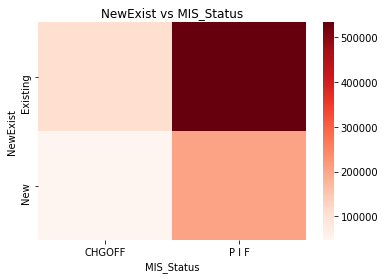

In [55]:
my_contingency_table = pd.crosstab(index=raw_data["NewExist"], columns=raw_data["MIS_Status"])
ax = sns.heatmap(my_contingency_table, cmap="Reds")
ax.set_title("NewExist vs MIS_Status")
p_value = chi2_contingency(my_contingency_table)[1]
print(p_value)

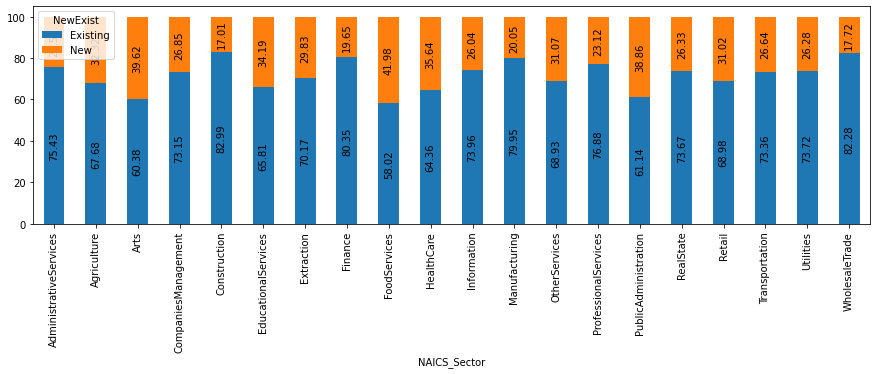

In [57]:
df4 = raw_data.groupby(['NAICS_Sector','NewExist'])['NewExist'].count()
ax4 = df4.groupby('NAICS_Sector').apply(perc).unstack().plot.bar(figsize=(15,4),stacked=True)
labels = [f'{i}' for i in df4.groupby('NAICS_Sector').apply(perc).unstack().to_numpy().flatten(order='F')]
for i, patch in enumerate(ax4.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax4.annotate(labels[i], (x, y), ha='center', va='center', c='black',rotation=90)

#### CreateJob: Number of jobs created
#### RetainedJob: Number of jobs retained

In [59]:
raw_data[['CreateJob','RetainedJob']].describe()

,CreateJob,RetainedJob
count,899164.000000,899164.000000
mean,8.430376,10.797257
std,236.688165,237.120600
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,4.000000
max,8800.000000,9500.000000


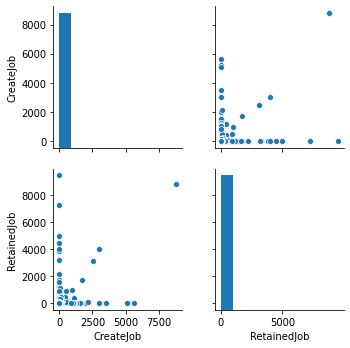

In [60]:
sns.pairplot(raw_data[['CreateJob','RetainedJob']])

<AxesSubplot:xlabel='NewExist', ylabel='RetainedJob'>

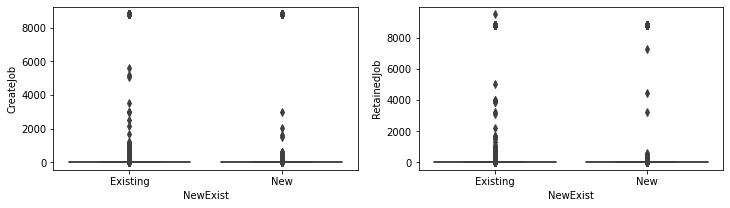

In [159]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.boxplot(x ='NewExist' , y='CreateJob',data=raw_data )

plt.subplot(122)
sns.boxplot(x ='NewExist' , y='RetainedJob',data=raw_data )

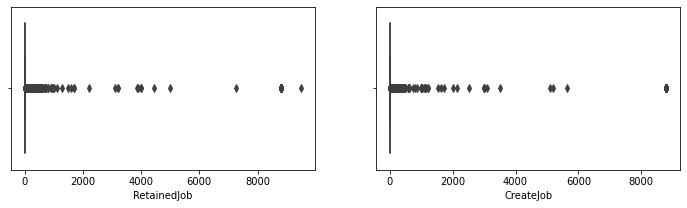

In [162]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.boxplot(x = 'RetainedJob', data = raw_data )

plt.subplot(122)
sns.boxplot(x='CreateJob', data = raw_data )
plt.show()

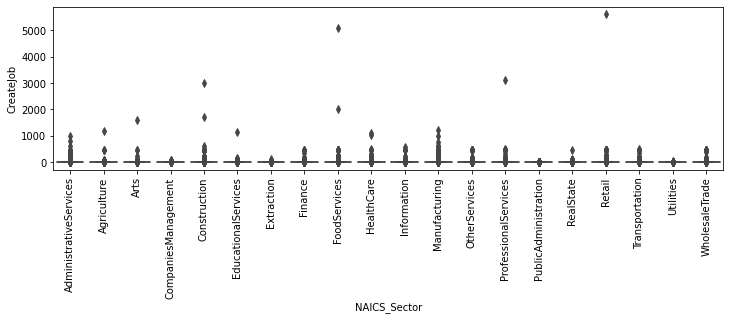

In [63]:
plt.figure(figsize=(12,3))
sns.boxplot(x = 'NAICS_Sector', y = 'CreateJob', data=raw_data )
plt.xticks(rotation=90)
plt.show()

#### FranchiseCode

In [65]:
raw_data['FranchiseCode_indicator'] = np.where(raw_data['FranchiseCode']>1,'Franchise','NoFranchise')
raw_data['FranchiseCode_indicator'] 

0         NoFranchise
1         NoFranchise
2         NoFranchise
3         NoFranchise
4         NoFranchise
             ...     
899159    NoFranchise
899160    NoFranchise
899161    NoFranchise
899162    NoFranchise
899163    NoFranchise
Name: FranchiseCode_indicator, Length: 899164, dtype: object

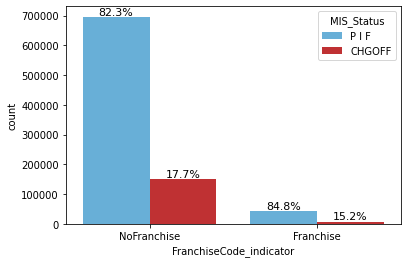

In [66]:
ax = sns.countplot(x = 'FranchiseCode_indicator', data= raw_data, hue ='MIS_Status',palette=newPal_dic)
annotate_countplot(ax)

#### UrbanRural: 
1 = Urban, 2 = rural, 0 = undefined

In [67]:
raw_data['UrbanRural'].unique()

array([0, 1, 2], dtype=int64)

In [68]:
raw_data['UrbanRural']= raw_data['UrbanRural'].replace({0: 'Undefined',
                                                        1: 'Urban',
                                                        2: 'Rural'}).astype('category')

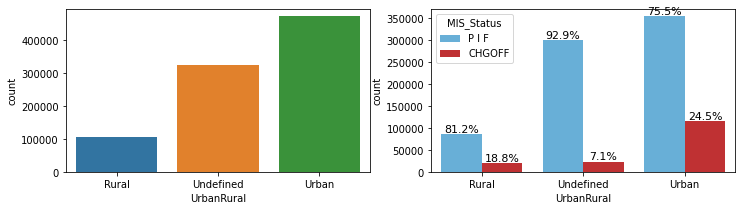

In [69]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'UrbanRural', data= raw_data)

plt.subplot(122)
ax= sns.countplot(x = 'UrbanRural', data= raw_data, hue = 'MIS_Status',palette=newPal_dic)
annotate_countplot(ax)

plt.show()

#### RevLineCr: Revolving line of credit
Y = Yes, N = No

In [70]:
raw_data['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

There are some errors in data entries. Lets fix them:

In [71]:
raw_data.loc[(raw_data['RevLineCr'] != 'N') & (raw_data['RevLineCr'] != 'Y'),'RevLineCr']=np.nan

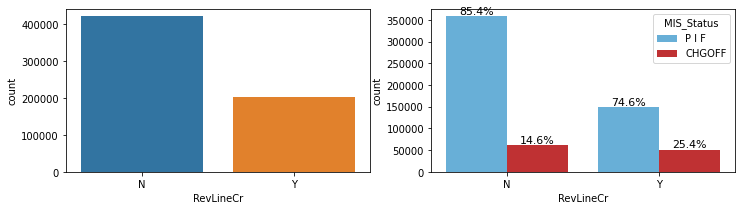

In [72]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'RevLineCr', data= raw_data)

plt.subplot(122)
ax = sns.countplot(x = 'RevLineCr', data= raw_data, hue = 'MIS_Status',palette=newPal_dic)
annotate_countplot(ax)

plt.show()

#### LowDoc: LowDoc Loan Program
Y = Yes, N = No

In [164]:
raw_data['LowDoc'].unique()

array(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'], dtype=object)

Once again, we need to fix the data entries errors:

In [74]:
raw_data.loc[(raw_data['LowDoc'] != 'N') & (raw_data['LowDoc'] != 'Y'),'LowDoc']=np.nan

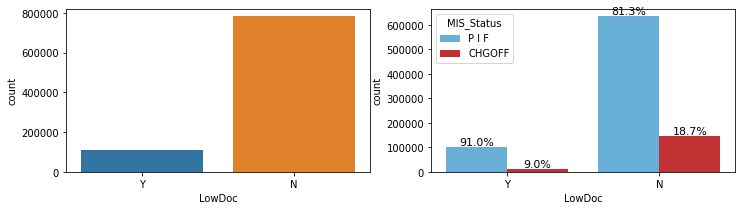

In [76]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'LowDoc', data= raw_data)

plt.subplot(122)
ax = sns.countplot(x = 'LowDoc', data= raw_data, hue = 'MIS_Status',palette=newPal_dic)
annotate_countplot(ax)

plt.show()

#### DisbursementGross: Amount disbursed

In [165]:
raw_data['DisbursementGross']

0          $60,000.00 
1          $40,000.00 
2         $287,000.00 
3          $35,000.00 
4         $229,000.00 
              ...     
899159     $70,000.00 
899160     $85,000.00 
899161    $300,000.00 
899162     $75,000.00 
899163     $30,000.00 
Name: DisbursementGross, Length: 899164, dtype: object

In [166]:
raw_data['DisbursementGross'] = raw_data['DisbursementGross'].apply(lambda money: Decimal(sub(r'[^\d.]', '', money)) ) 
raw_data['DisbursementGross'] = raw_data['DisbursementGross'].astype('float')

In [79]:
raw_data.groupby('MIS_Status')['DisbursementGross'].describe()

,count,mean,std,min,25%,50%,75%,max
MIS_Status,,,,,,,,
CHGOFF,157558.0,132507.851953,211778.892978,4000.0,27500.0,61500.0,140000.0,4362157.0
P I F,739609.0,216316.231743,299483.799766,4000.0,48924.0,100000.0,256000.0,11446325.0


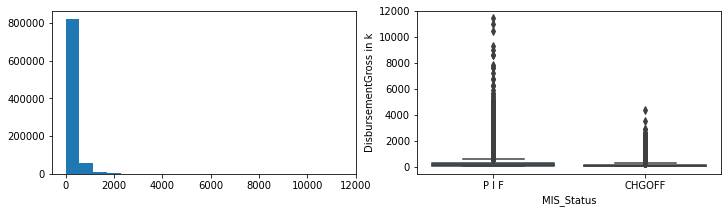

In [177]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.hist(raw_data['DisbursementGross']/1000, bins=20)

plt.subplot(122)
sns.boxplot(y = raw_data['DisbursementGross']/1000, data = raw_data, x = 'MIS_Status' )
plt.ylabel('DisbursementGross in k')
plt.show()

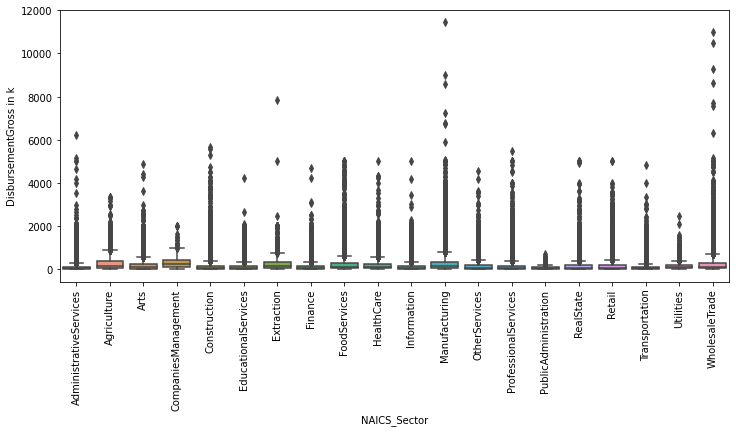

In [173]:
plt.figure(figsize=(12,5))
sns.boxplot(y = raw_data['DisbursementGross']/1000,  x = raw_data['NAICS_Sector'] )
plt.ylabel('DisbursementGross in k')
plt.xticks(rotation=90)
plt.show()

#### BalanceGross: Gross amount outstanding

In [174]:
raw_data['BalanceGross']

0         $0.00 
1         $0.00 
2         $0.00 
3         $0.00 
4         $0.00 
           ...  
899159    $0.00 
899160    $0.00 
899161    $0.00 
899162    $0.00 
899163    $0.00 
Name: BalanceGross, Length: 899164, dtype: object

In [175]:
raw_data['BalanceGross'] = raw_data['BalanceGross'].apply(lambda money: Decimal(sub(r'[^\d.]', '', money)) ) 
raw_data['BalanceGross'] = raw_data['BalanceGross'].astype('float')

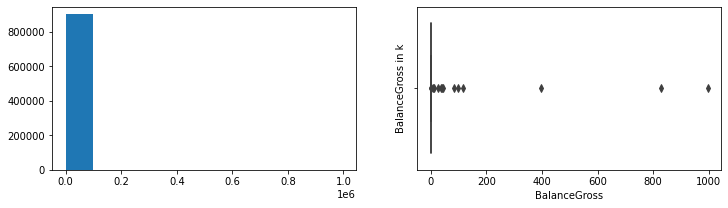

In [178]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.hist(raw_data['BalanceGross'])

plt.subplot(122)
sns.boxplot(raw_data['BalanceGross']/1000)
plt.ylabel('BalanceGross in k')

plt.show()

#### ChgOffPrinGr: Charged-off amount

In [85]:
raw_data['ChgOffPrinGr'] = raw_data['ChgOffPrinGr'].apply(lambda money: Decimal(sub(r'[^\d.]', '', money)) ) 
raw_data['ChgOffPrinGr'] = raw_data['ChgOffPrinGr'].astype('float')

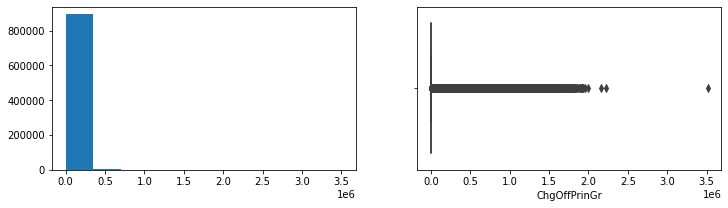

In [86]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.hist(raw_data['ChgOffPrinGr'])

plt.subplot(122)
sns.boxplot('ChgOffPrinGr', data = raw_data )
plt.show()

#### GrAppv: Gross amount of loan approved by bank

In [87]:
raw_data['GrAppv'] = raw_data['GrAppv'].apply(lambda money: Decimal(sub(r'[^\d.]', '', money)) ) 
raw_data['GrAppv'] = raw_data['GrAppv'].astype('float')

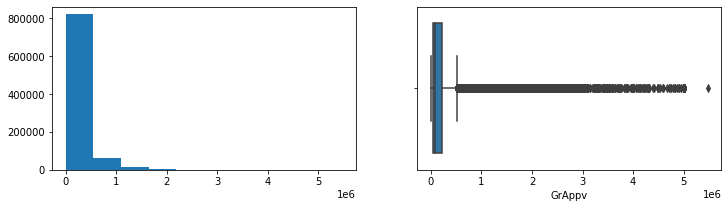

In [88]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.hist(raw_data['GrAppv'])

plt.subplot(122)
sns.boxplot('GrAppv', data = raw_data )
plt.show()

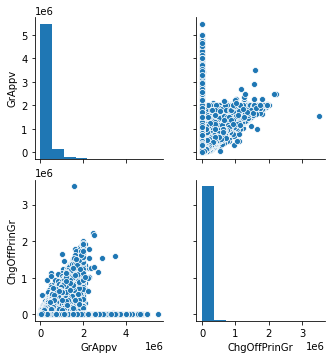

In [89]:
sns.pairplot(raw_data[['GrAppv','ChgOffPrinGr']])

#### SBA_Appv: SBA’s guaranteed amount of approved loan

In [90]:
raw_data['SBA_Appv'] = raw_data['SBA_Appv'].apply(lambda money: Decimal(sub(r'[^\d.]', '', money)) ) 
raw_data['SBA_Appv'] = raw_data['SBA_Appv'].astype('float')

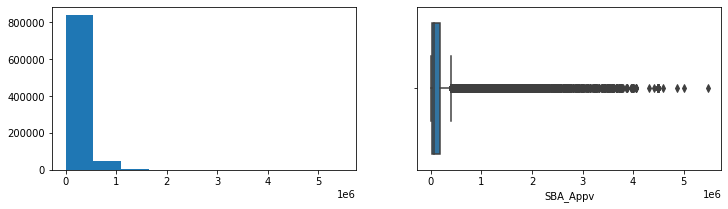

In [91]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.hist(raw_data['SBA_Appv'])

plt.subplot(122)
sns.boxplot('SBA_Appv', data = raw_data )
plt.show()

#### Dates

In [180]:
# ApprovalDate: Date SBA commitment issued
raw_data['ApprovalDate'] = pd.to_datetime(raw_data['ApprovalDate'])
# ChgOffDate: The date when a loan is declared to be in default
raw_data['ChgOffDate'] = pd.to_datetime(raw_data['ChgOffDate'])
raw_data['DisbursementDate'] = pd.to_datetime(raw_data['DisbursementDate'])

In [181]:
df = pd.DataFrame({'time_difference':(raw_data.loc[raw_data['ChgOffDate'].notnull(),'ChgOffDate']-
                                     raw_data.loc[raw_data['ChgOffDate'].notnull(),'DisbursementDate'])
                                     .dt.days})

In [145]:
any(raw_data.loc[raw_data['ChgOffDate'].notnull(),'MIS_Status']== 'P I F')

True

In [148]:
any(raw_data.loc[raw_data['ChgOffDate'].notnull(),'DisbursementDate']>raw_data.loc[raw_data['ChgOffDate'].notnull(),'ChgOffDate'])

True

weird!

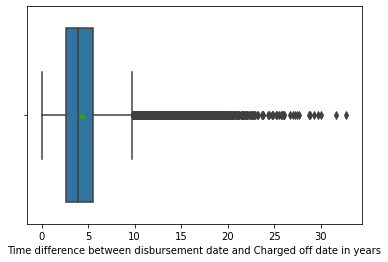

In [183]:
sns.boxplot(x = 'time_difference', data=df[df['time_difference']>=0]/365,showmeans=True)
plt.xlabel('Time difference between disbursement date and Charged off date in years')
plt.show()

### Feature engineering

##### GrossPortion

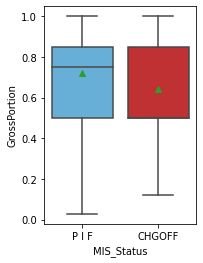

In [153]:
raw_data['GrossPortion'] = raw_data['SBA_Appv']/raw_data['GrAppv']

plt.subplot(122)
sns.boxplot(y='GrossPortion', data = raw_data, x = 'MIS_Status',showmeans=True, palette=newPal_dic)
plt.show()

Paid in full loans have a higher gross portion.

##### BackedByRealState

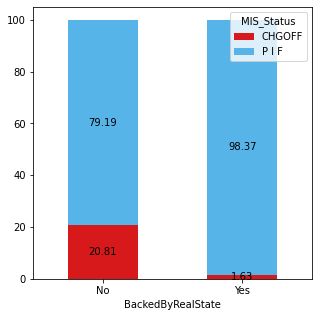

In [154]:
raw_data['BackedByRealState']= np.where(raw_data['Term']>=240,'Yes','No')
df4 = raw_data.groupby(['BackedByRealState','MIS_Status'])['MIS_Status'].count()
ax4 = df4.groupby('BackedByRealState').apply(perc).unstack().plot.bar(figsize=(5,5),stacked=True,rot=0, color=newPal)
labels = [f'{i}' for i in df4.groupby('BackedByRealState').apply(perc).unstack().to_numpy().flatten(order='F')]
for i, patch in enumerate(ax4.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax4.annotate(labels[i], (x, y), ha='center', va='center', c='black')

In [158]:
raw_data.to_csv('raw_data_cleaned.csv')